# AE4465 (MM&A) - Lecture 2 (Reliability measures)

A random variable (RV) such as time to failure (TTF) can be characterized by different reliability measures.

### Probability density function (pdf) and Failure function (F(t) or CDF)

A probability density function is most commonly associated with absolutely continuous univariate distributions. A random variable $T$ has density $f_{T}$, where $f_T$ is a non-negative Lebesgue-integrable function, if:

$$ \Pr(\{a\leq T\leq b\}) =\int _{a}^{b}f_{T}(t)\,dt$$

Hence, if $F_{T}$ is the cumulative distribution function of $T$, then:

$$F_{T}(t)=\int _{-\infty }^{t}f_{T}(u)\,du,$$

Since the pdf is zero for $x<0$ we consider that the failure function is the CDF such that:

$$F_{T}(t)=\Pr(\{T\leq t\})  = \int _{0}^{t}f_{T}(u)\,du,$$

In [35]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import reliability
from reliability.Distributions import Weibull_Distribution
from reliability.Distributions import Lognormal_Distribution

In [2]:
# Import the data in csv file
maintenance_dt = pd.read_csv('data/les02_RVdata.csv')
# Read the columns
print('The columns of the csv file are: ')
# Iterate over two arrays (column names and index) and print accordingly
for colname, i in zip(maintenance_dt.columns, range(len(maintenance_dt.columns))):
    print(i, '- Column: ', colname)

The columns of the csv file are: 
0 - Column:  Equipment
1 - Column:  Time to failure


### Histogram and cumulative histogram

We will plot the histogram (equivalent to pdf) and the cumulative histogram  (equivalent to CDF).

Text(0, 0.5, 'Frequency')

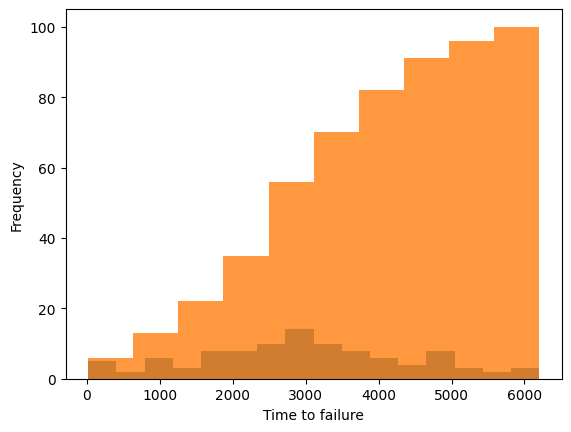

In [8]:
#plot the histogram and cumulative histogram
ttfs = maintenance_dt['Time to failure']
plt.hist(ttfs, bins=16)
plt.hist(ttfs, cumulative=True, alpha=0.8)
plt.xlabel('Time to failure')
plt.ylabel('Frequency')

### Data analysis

The CDF gives you the proportion of equipment that will have failed after some time. For example, at 3000, we can see that around 56% of the equipment will have failed.

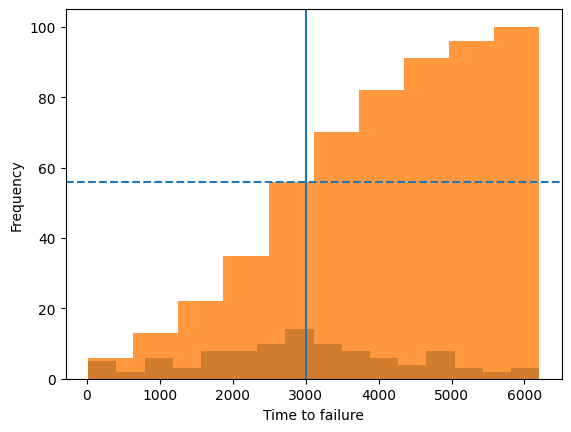

In [12]:
#plot the histogram and cumulative histogram
ttfs = maintenance_dt['Time to failure']
plt.hist(ttfs, bins=16)
plt.hist(ttfs, cumulative=True, alpha=0.8)
plt.xlabel('Time to failure')
plt.ylabel('Frequency')
plt.axvline(3000)
plt.axhline(56, linestyle='--')

### Survival function

The survival function is the function that gives the probability that the equipment will survive past a certain time.

$$S(t)=\Pr(\{T>t\})=\int _{t}^{\infty }f(u)\,du=1-F_T(t)$$

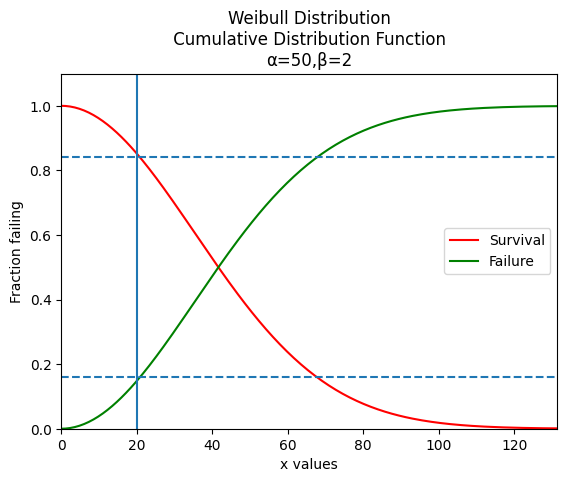

84% of the equipment will survive more than 20
16% of the equipment will fail before 20


In [29]:
dist = Weibull_Distribution(alpha=50, beta=2)  # this created the distribution object
dist.SF(color='red', label='Survival')  # this creates the survival function
dist.CDF(color='green', label='Failure')
plt.legend()
plt.axvline(20)
plt.axhline(.84, linestyle='--')
plt.axhline(.16, linestyle='--')
plt.show()
print('84% of the equipment will survive more than 20')
print('16% of the equipment will fail before 20')

### Hazard function

The hazard function, conventionally denoted $z$ or $h$, is defined as the event rate at time $t$ conditional on survival until time $t$ or later (that is, $TTF\geq t$). Suppose that an item has survived for a time $t$ and we want the probability that it will not survive for an additional time $dt$:

$$ z(t)=\lim _{dt\rightarrow 0}{\frac {\Pr(t\leq T<t+dt)}{dt\cdot S(t)}}={\frac {f(t)}{S(t)}}=-{\frac {S'(t)}{S(t)}}$$

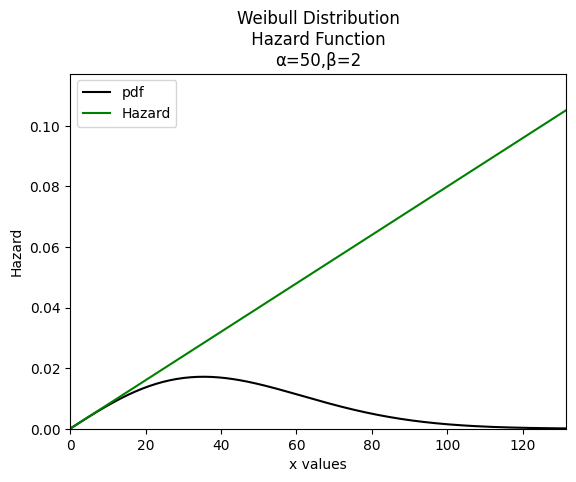

The risk of failing if you have survived until 40 is higher than at 20
The risk of failing if you have survived until 100 is higher than at 40


In [33]:
dist = Weibull_Distribution(alpha=50, beta=2)  # this created the distribution object
dist.PDF(color='black', label='pdf')
dist.HF(color='green', label='Hazard')
plt.legend()
plt.show()
print('The risk of failing if you have survived until 40 is higher than at 20')
print('The risk of failing if you have survived until 100 is higher than at 40')

### Mean and variance

The mean and variance of a TTF random variable can be expressed as

$${\text{MTBF}=\int _{0}^{\infty }S(t)\,dt=\int _{0}^{\infty }tf(t)$$

$$\operatorname {Var} (T)=\operatorname {E} \left[(T-\mu )^{2}\right]$$

The expression for the variance can be expanded as follows:

$${\displaystyle {\begin{aligned}\operatorname {Var} (X)&=\operatorname {E} \left[(X-\operatorname {E} [X])^{2}\right]\\&=\operatorname {E} \left[X^{2}-2X\operatorname {E} [X]+\operatorname {E} [X]^{2}\right]\\&=\operatorname {E} \left[X^{2}\right]-2\operatorname {E} [X]\operatorname {E} [X]+\operatorname {E} [X]^{2}\\&=\operatorname {E} \left[X^{2}\right]-\operatorname {E} [X]^{2}\end{aligned}}}$$

the variance of X is equal to the mean of the square of X minus the square of the mean of X. It is easier to deduce with this formula.

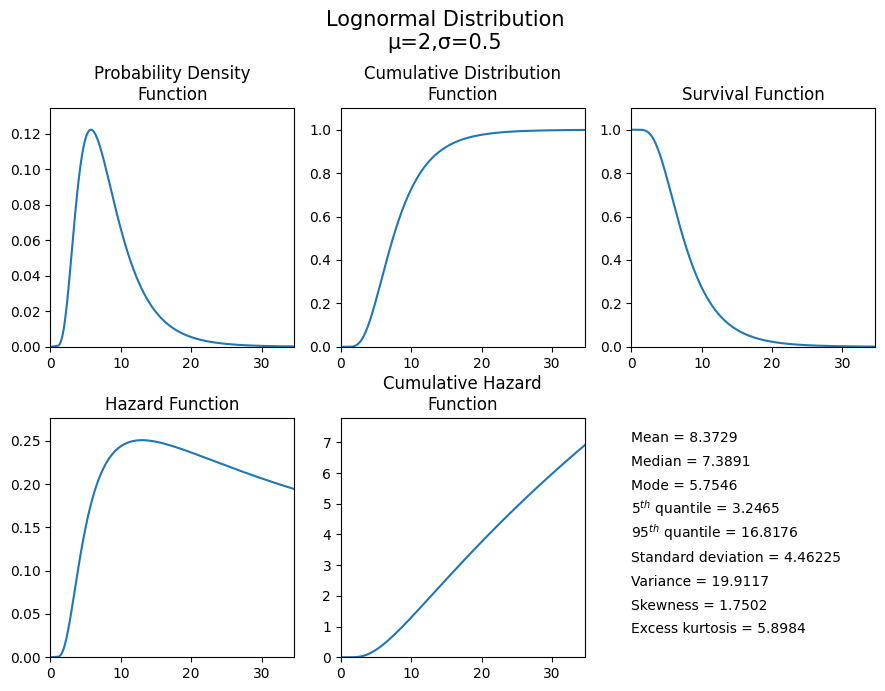

Mean of lognorm is 8.372897488127265
Variance of lognorm is 19.911718953833947
Stdev of lognorm is 4.462254918069333


In [40]:
dist = Lognormal_Distribution(mu=2,sigma=0.5)
dist.plot()
print('Mean of lognorm is', dist.mean)
print('Variance of lognorm is', dist.variance)
print('Stdev of lognorm is', dist.standard_deviation)